In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
21,406 cases (7 day average) as of Tue 14 Sep, -758.4 since Mon 13 Sep
694 hospitalised (7 day average) as of Wed 15 Sep, +0.0 since Wed 15 Sep
101 died (7 day average) as of Tue 14 Sep, -0.1 since Mon 13 Sep


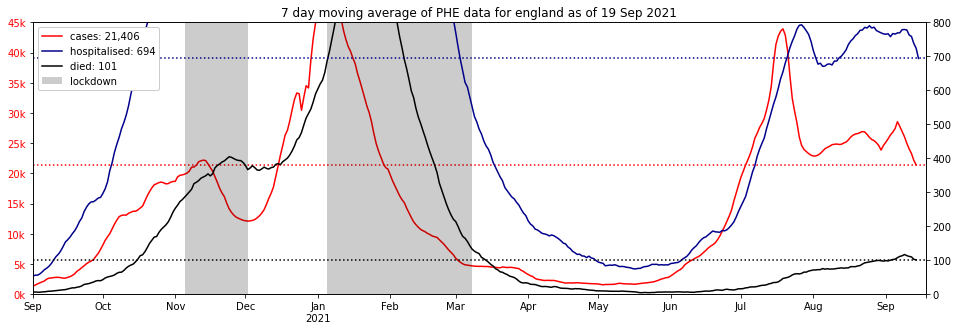

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

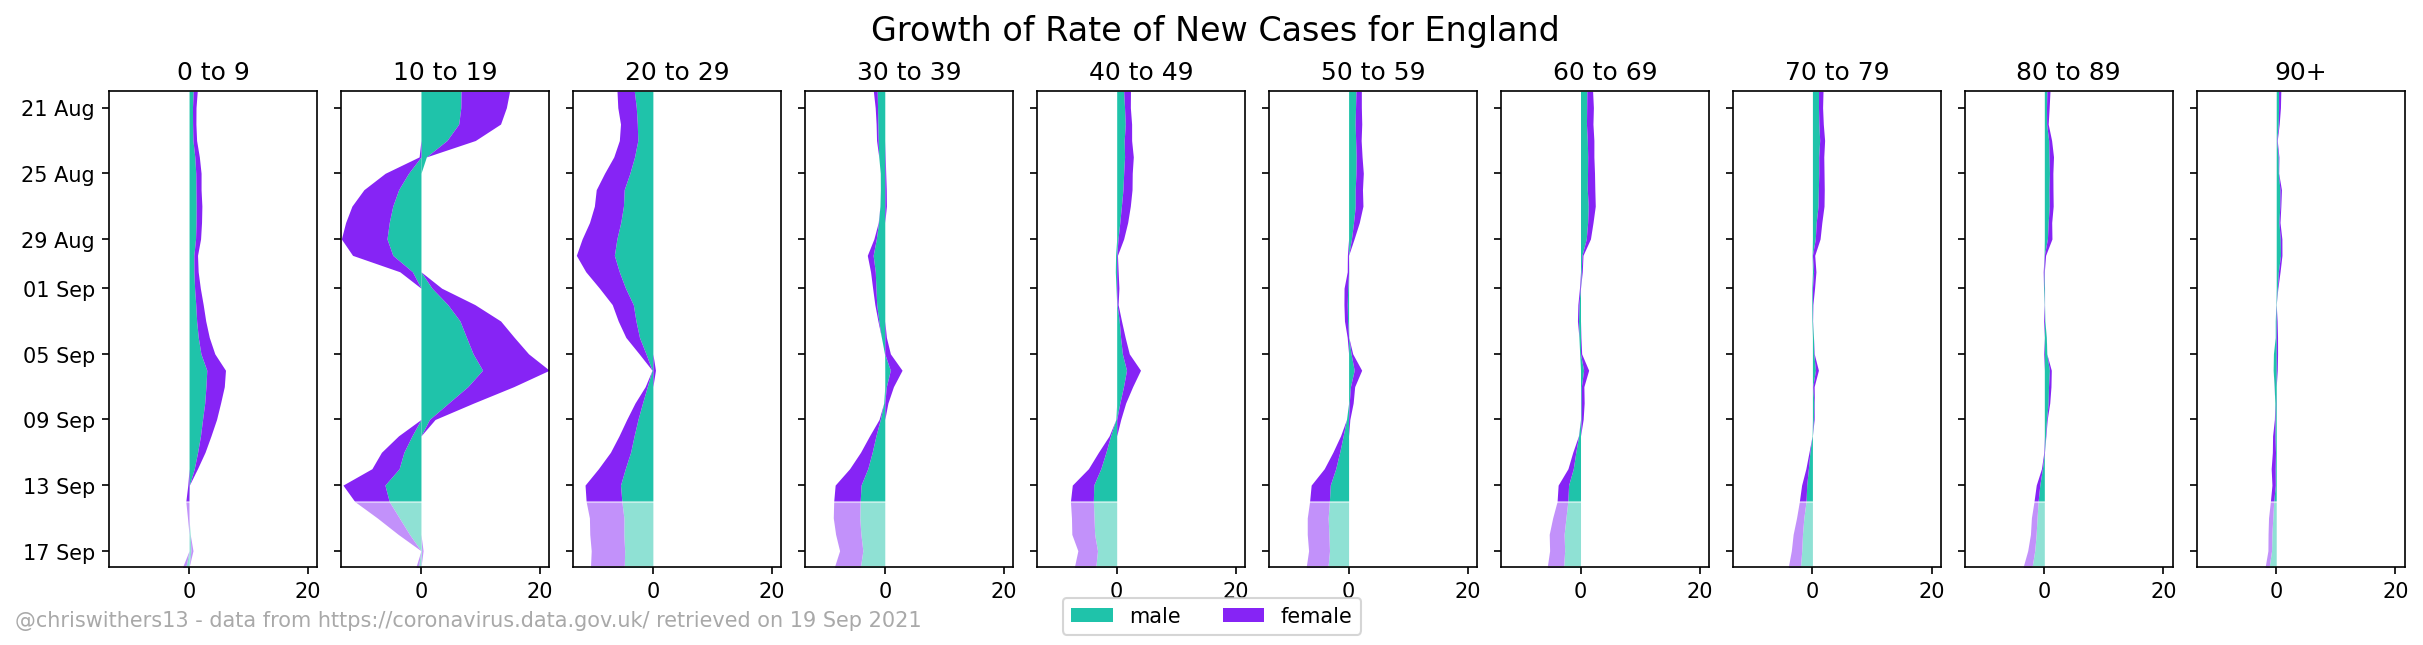

In [4]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

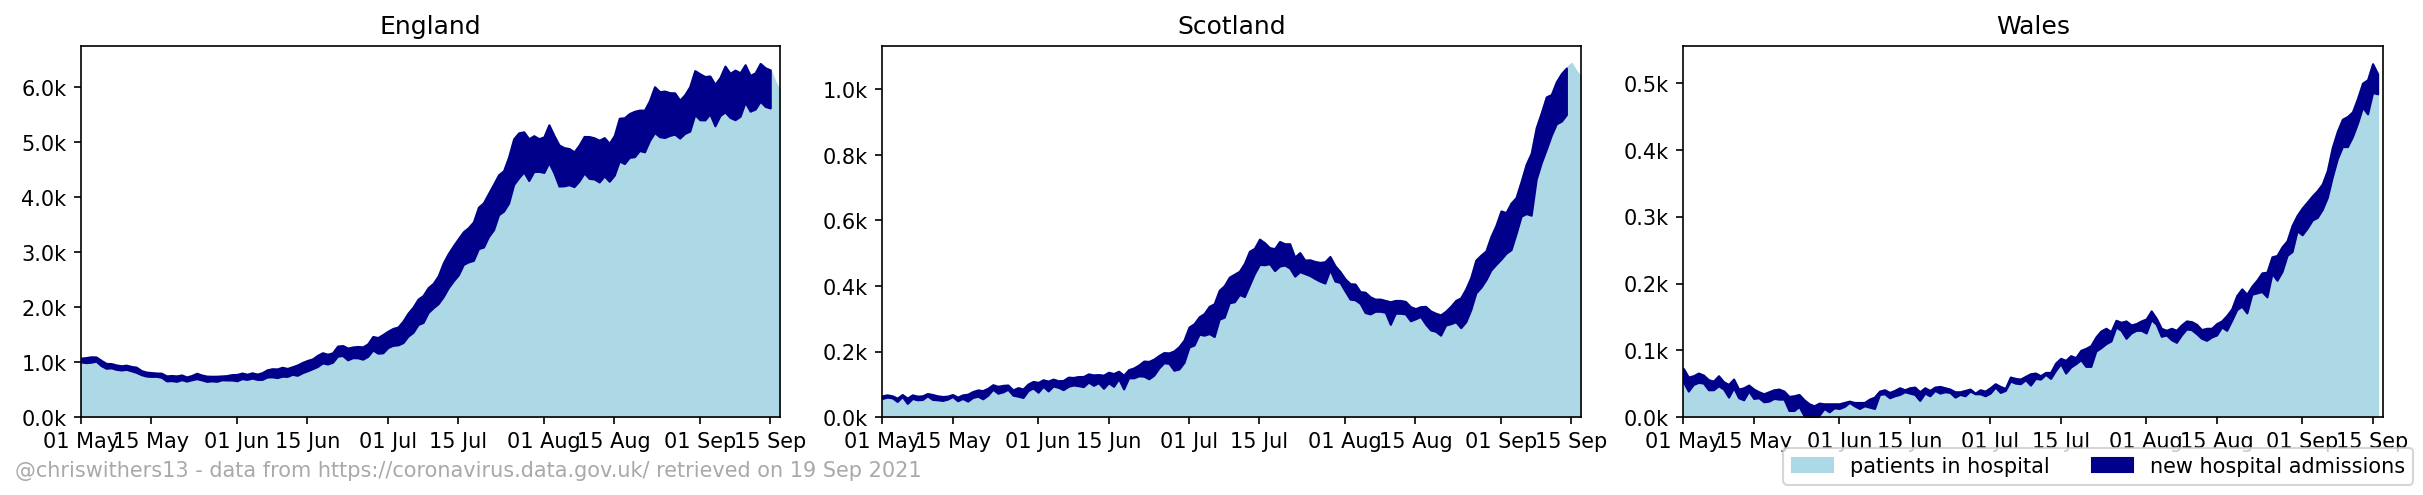

In [5]:
hospital_plot(start='2021-05', figsize=(16,3), figs=(1, 3))

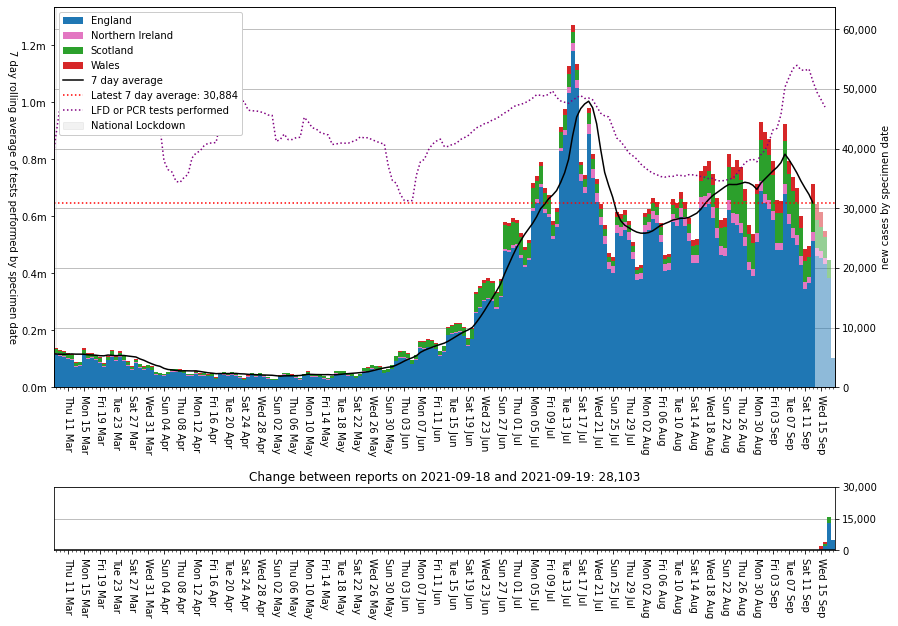

In [6]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

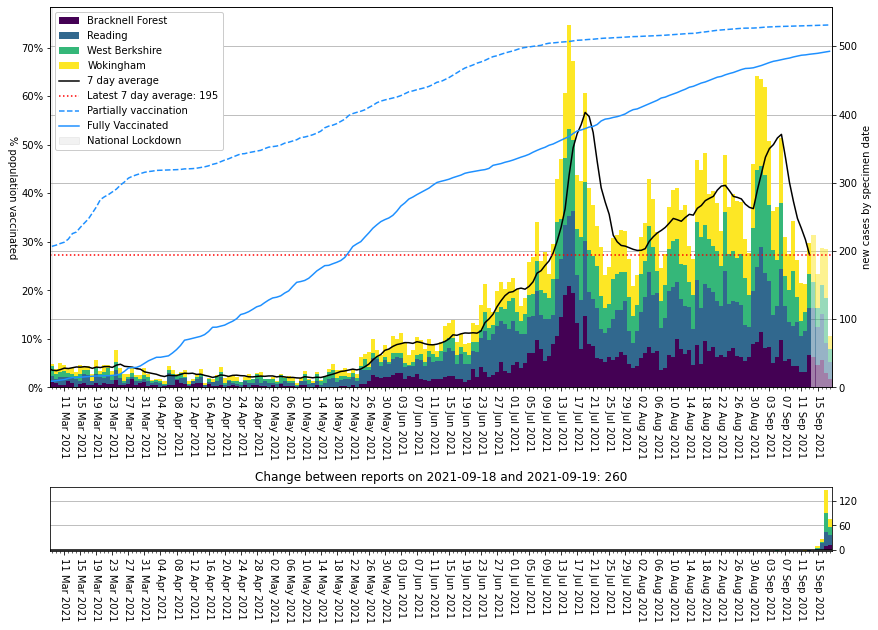

In [7]:
plot_areas(for_date, areas=my_areas, lines=population_vaccinated)

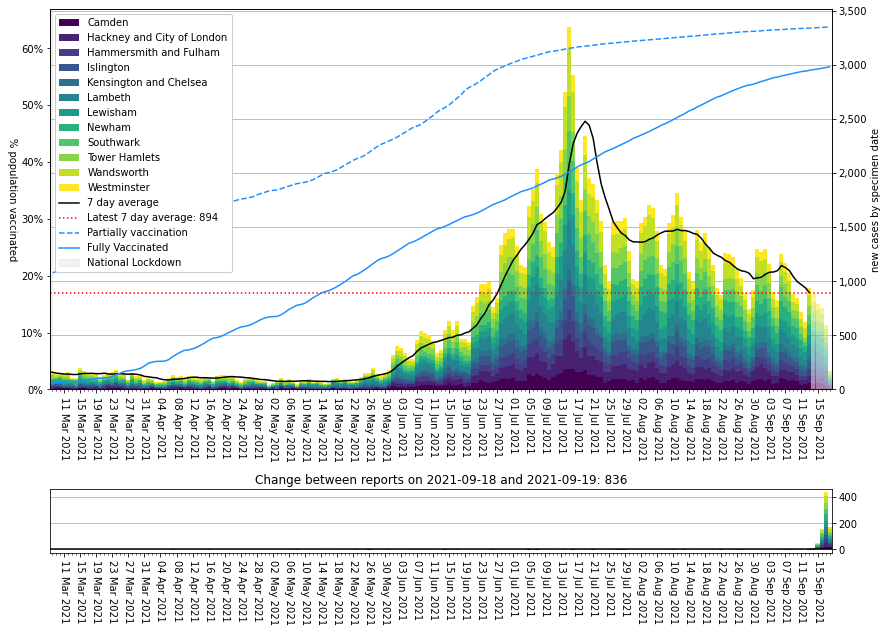

In [8]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                     
S12000039  West Dunbartonshire          658.945238                   586.0   
W06000012    Neath Port Talbot          598.681227                   858.0   
S12000028       South Ayrshire          596.749845                   672.0   
S12000050    North Lanarkshire          575.328822                  1964.0   
S12000038         Renfrewshire          563.372418                  1009.0   
E07000150                Corby          558.032623                   403.0   
S12000011    East Renfrewshire          545.378415                   521.0   
S12000021       North Ayrshire          534.362476                   720.0   
E07000026            Allerdale          532.932355                   521.0   
S12000045  East Dunbartonshire          522.827688                   568.0   

          Specimen date  
areaCode                 
S12000039    2021-09-18  
W06000012    2021-09-16  
S12000028    2021-09-18  
S12000050    2021-09-18  
S12000038    2021-09-18  
E07000150    2021-09-18  
S12000011    2021-09-18  
S12000021    2021-09-18  
E07000026    2021-09-18  
S12000045    2021-09-18

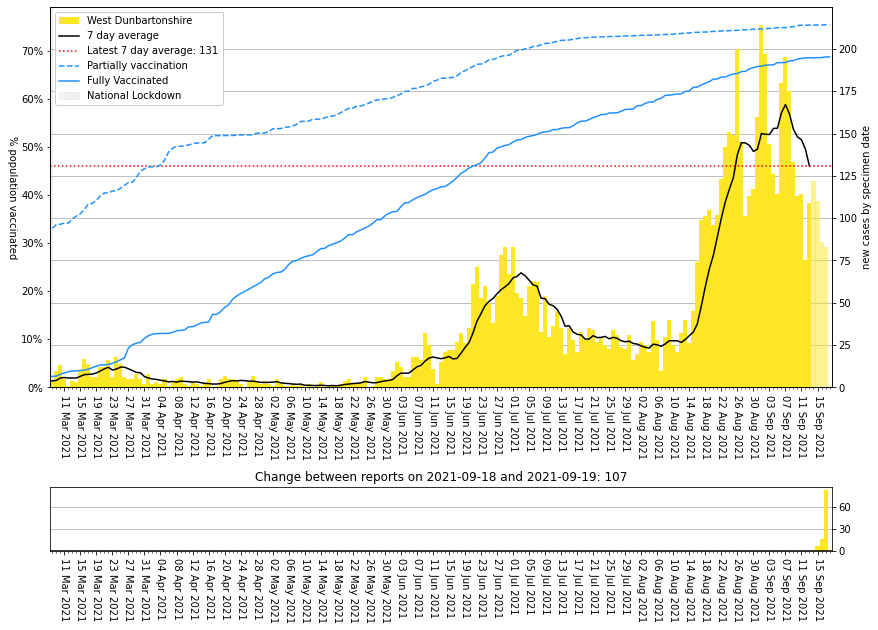

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                   
S12000049       Glasgow City          450.309578                  2851.0   
E08000025         Birmingham          201.083187                  2296.0   
S12000050  North Lanarkshire          575.328822                  1964.0   
E08000035              Leeds          229.972300                  1824.0   
S12000047               Fife          484.540222                  1810.0   
S12000036  City of Edinburgh          339.854838                  1784.0   
E06000047      County Durham          293.721491                  1557.0   
S12000029  South Lanarkshire          472.966649                  1516.0   
E08000019          Sheffield          233.904930                  1368.0   
E06000049      Cheshire East          348.820259                  1340.0   

          Specimen date  
areaCode                 
S12000049    2021-09-18  
E08000025    2021-09-18  
S12000050    2021-09-18  
E08000035    2021-09-18  
S12000047    2021-09-18  
S12000036    2021-09-18  
E06000047    2021-09-18  
S12000029    2021-09-18  
E08000019    2021-09-18  
E06000049    2021-09-18

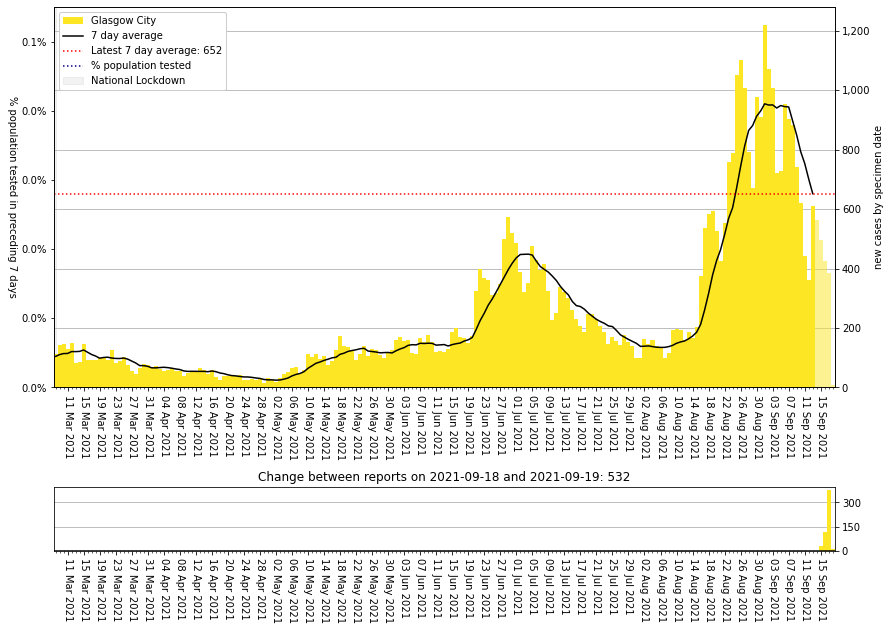

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

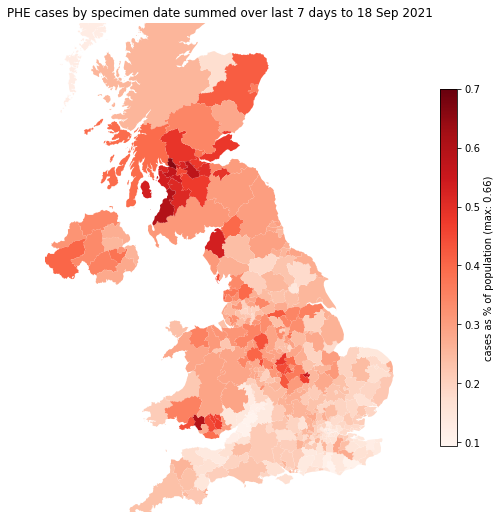

Loading BokehJS ...

In [14]:
summed_maps(for_date, vmax=0.7)

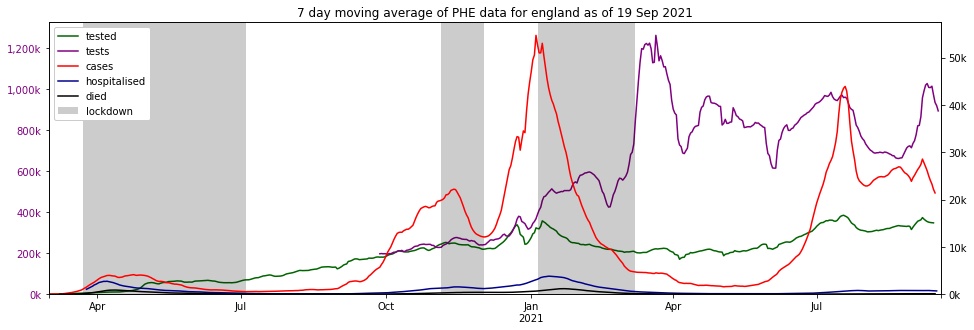

In [15]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

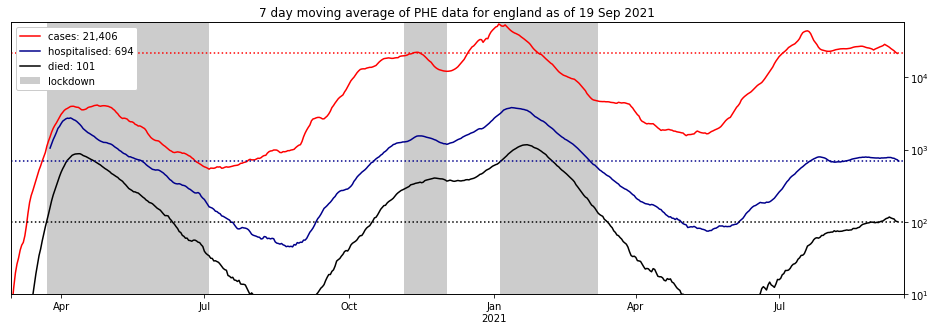

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [17]:
vaccination_changes()

areaName   areaCode        full         any    partial  population  \
0           England  E92000001  37214246.0  40742497.0  3528251.0    56286961   
1  Northern Ireland  N92000002   1200606.0   1304999.0   104393.0     1893667   
2          Scotland  S92000003   3806980.0   4155048.0   348068.0     5463300   
3             Wales  W92000004   2206377.0   2371337.0   164960.0     3152879   

    full_pct  partial_pct   none_pct  
0  66.115216     6.268327  27.616456  
1  63.401115     5.512743  31.086141  
2  69.682792     6.371021  23.946186  
3  69.979755     5.232043  24.788202

'partial: 48,573,881 (72.7%), full: 44,428,209'

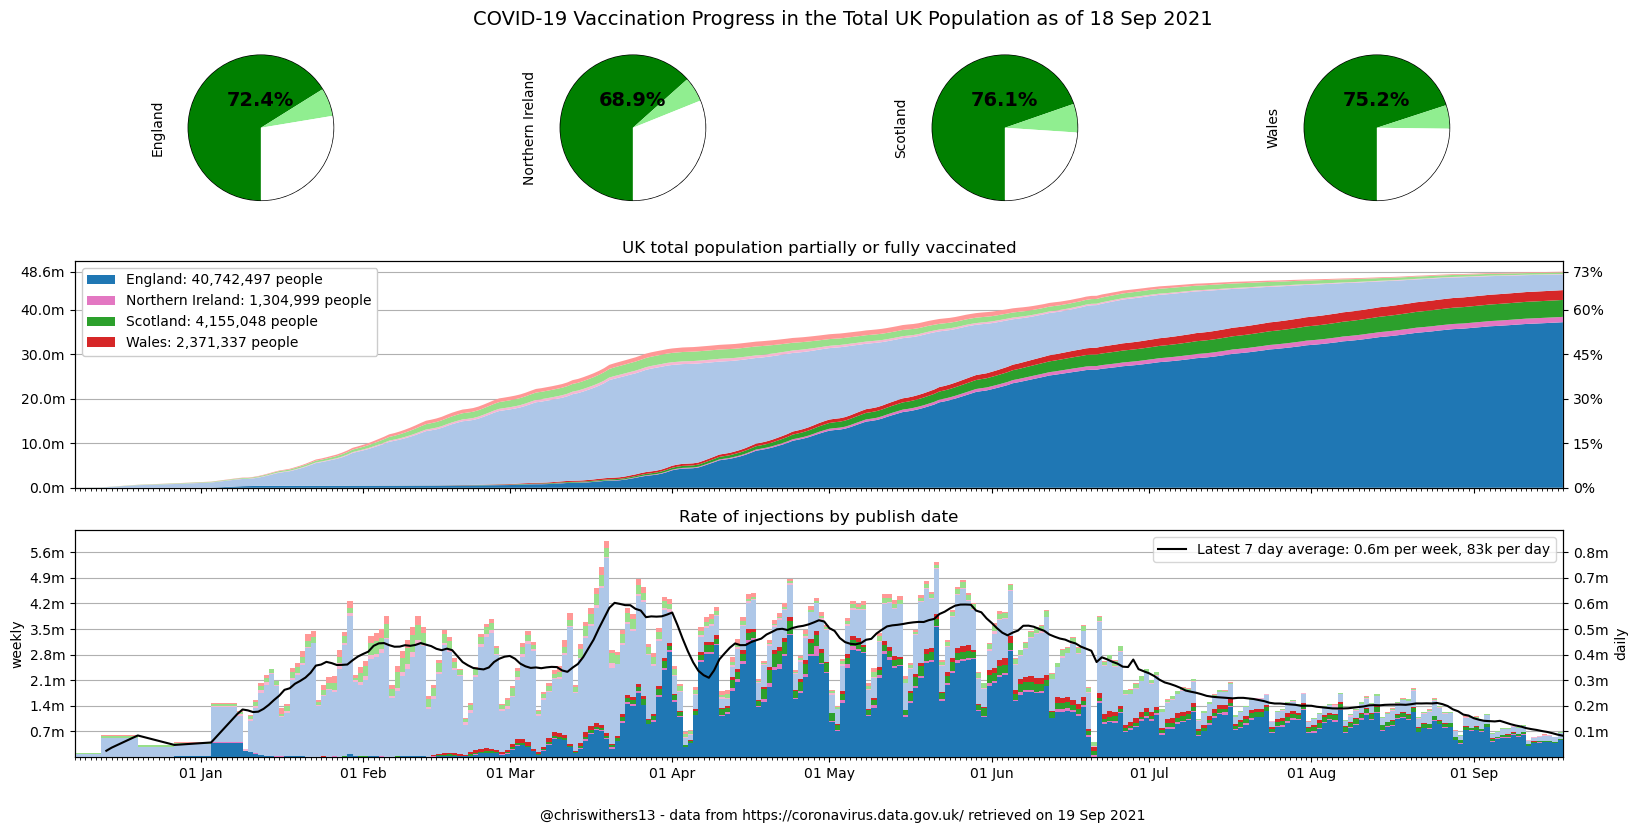

In [18]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")